## **Project details**:

**The goal of this project is to perform exploratory data analysis using sql in jupyter notebook with the aid of jupysql(an improvement over ipythonsql) and duckdb (which is an in-process SQL OLAP Database Management System). The database used is the California Traffic Collision Data from SWITRS obtained from kaggle.This data comes from the California Highway Patrol and covers collisions from January 1st, 2001 until mid 2021**



#### Necessary imports and configuration 

In [1]:
#Necessary imports
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
# Import jupysql Jupyter extension to create SQL cells
%load_ext sql
#configuration for jupysql to not return data as a Pandas dataframe 
#and to have less verbose output
%config SqlMagic.autopandas = False
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%config SqlMagic.displaylimit=False

In [3]:
#connecting to duckdb
%sql duckdb:///

#### Read data

In [4]:
#use sqlite_scanner to read data from a SQLite database file
%sql INSTALL 'sqlite_scanner';
%sql LOAD 'sqlite_scanner';
%sql CALL sqlite_attach('switrs.sqlite');

Success


#### Check available tables

In [5]:
#check tables 
%sql SHOW TABLES;

name
case_ids
collisions
parties
victims


***There are three main tables:***

***collisions: Contains information about the collision, where it happened, what vehicles were involved etc. ,each row represents a distinct collision,
 parties contains information about the groups of people directly involved in the collision while
 victims contains information about the injuries of specific people involved in the collision.
There is also a table called case_ids which was used to build the other tables.***

#### Check each table columns and details to help analysis

In [6]:
%sql DESCRIBE collisions;


column_name,column_type,null,key,default,extra
case_id,VARCHAR,YES,None,None,None
jurisdiction,BIGINT,YES,None,None,None
officer_id,VARCHAR,YES,None,None,None
reporting_district,VARCHAR,YES,None,None,None
chp_shift,VARCHAR,YES,None,None,None
population,VARCHAR,YES,None,None,None
county_city_location,VARCHAR,YES,None,None,None
county_location,VARCHAR,YES,None,None,None
special_condition,VARCHAR,YES,None,None,None
beat_type,VARCHAR,YES,None,None,None


In [7]:
%sql DESCRIBE parties;

column_name,column_type,null,key,default,extra
id,BIGINT,YES,None,None,None
case_id,VARCHAR,YES,None,None,None
party_number,BIGINT,YES,None,None,None
party_type,VARCHAR,YES,None,None,None
at_fault,BIGINT,YES,None,None,None
party_sex,VARCHAR,YES,None,None,None
party_age,BIGINT,YES,None,None,None
party_sobriety,VARCHAR,YES,None,None,None
party_drug_physical,VARCHAR,YES,None,None,None
direction_of_travel,VARCHAR,YES,None,None,None


In [8]:
%sql DESCRIBE victims;

column_name,column_type,null,key,default,extra
id,BIGINT,YES,None,None,None
case_id,VARCHAR,YES,None,None,None
party_number,BIGINT,YES,None,None,None
victim_role,VARCHAR,YES,None,None,None
victim_sex,VARCHAR,YES,None,None,None
victim_age,BIGINT,YES,None,None,None
victim_degree_of_injury,VARCHAR,YES,None,None,None
victim_seating_position,VARCHAR,YES,None,None,None
victim_safety_equipment_1,VARCHAR,YES,None,None,None
victim_safety_equipment_2,VARCHAR,YES,None,None,None


## Answering some questions:

## 1. the time duration covered by the database

In [9]:
%%sql
SELECT MIN(cast(collision_date as DATE)) as 'lowest date',
       MAX(cast(collision_date as DATE)) as 'highest date'
FROM collisions;

lowest date,highest date
2001-01-01,2021-06-03


This database contain records of collisions from 1st of january, 2001 to 3rd of june, 2021

## 2.Total number of collisions recorded?


In [10]:
%%sql
SELECT COUNT(case_id) AS 'Total collisions'
FROM collisions;

Total collisions
9424334


The total number of collisions recorded is 9424334 (nine million four hundred twenty-four thousand three hundred thirty-four collisions)

## 3. Year with highest collisions recorded?

In [11]:
%%sql
SELECT EXTRACT(YEAR FROM CAST(collision_date AS DATE)) AS 'year',COUNT(*) AS 'Number of collisions'
FROM collisions
GROUP BY year
ORDER BY COUNT(*) DESC

year,Number of collisions
2002,544741
2003,538954
2004,538295
2005,532725
2001,522562
2007,501908
2006,498846
2016,491619
2017,486432
2018,482296


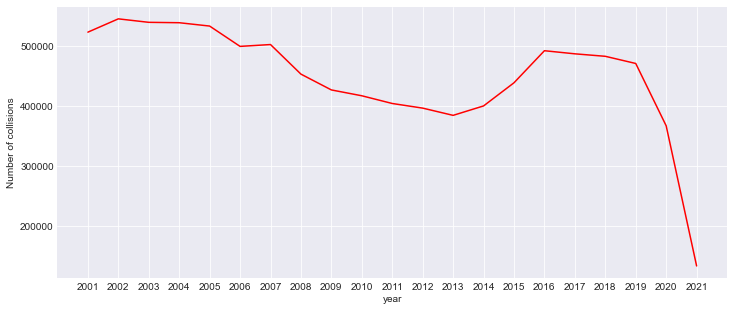

In [12]:
year_count_rs= %sql SELECT EXTRACT(YEAR FROM CAST(collision_date AS DATE)) AS 'year',COUNT(*) AS 'Number of collisions'\
            FROM collisions \
            GROUP BY year \
            ORDER BY COUNT(*) DESC

year_count_df=year_count_rs.DataFrame()
plt.figure(figsize=(12,5))
sns.lineplot(data=year_count_df,x='year',y='Number of collisions',color='red',markers='o')
plt.xticks(range(2001,2022))
plt.show()

From the table and the graph, the year 2002 had the highest collisions recorded. the top 3 years with highest collsions records are 2002, 2003,2004. 2021 had the lowest collisions recorded since 2001, however, it should be noted that the data only covers first 6 months of 2021. apart from 2021,2020 has the second lowest collisions. 

## 4. county with highest collisions?

In [13]:
%%sql
SELECT county_location,COUNT(*) as 'Total collisions per county'
FROM collisions
GROUP BY county_location
ORDER BY COUNT(*) DESC
LIMIT 10

county_location,Total collisions per county
los angeles,2851925
orange,728565
san bernardino,569376
san diego,535596
riverside,493758
alameda,466969
sacramento,403575
santa clara,342603
contra costa,217025
san joaquin,209185


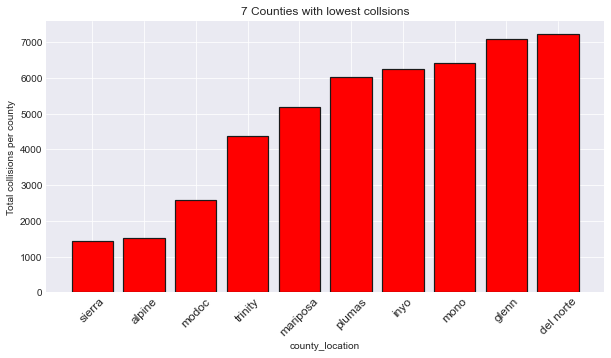

In [14]:
#plot top 7 counties with lowest collisions
plot = %sql SELECT county_location,COUNT(*) as 'Total collisions per county' \
        FROM collisions \
        GROUP BY county_location \
        ORDER BY COUNT(*) \
        LIMIT 10;

plt.figure(figsize=(10,5))
plot.bar(color='red',edgecolor='0.1',linewidth=1.2).set_title('7 Counties with lowest collsions')
plt.xticks(fontsize=12)
plt.show()

Los angeles has the highest collisions with more than 2M entries while sierra has the lowest with about 1447 collisions recorded. the top 7 counties with the lowest collisions are shown in the graph above

## 

## 5. how many collision involved alcohol?

In [15]:
%%sql 
SELECT Round ((SUM(alcohol_involved))*1.0 / (count(case_id)) *100,2) AS 'Percentage of alcohol invoved'
FrOM collisions


Percentage of alcohol invoved
10.02


10.02% of the overall collisions involved alcohol

## 6. which day of the week had more collisions involving alcohol?

In [16]:
%%sql
SELECT DAYNAME (CAST(collision_date AS DATE)) AS 'Day of the week',
       COUNT(*) AS 'Total collisions involving alcohol'
FROM collisions
WHERE alcohol_involved=1
GROUP BY DAYNAME (CAST(collision_date AS DATE))
ORDER BY "Total collisions involving alcohol" DESC


Day of the week,Total collisions involving alcohol
Saturday,207556
Sunday,203452
Friday,146441
Thursday,105232
Monday,99433
Wednesday,94321
Tuesday,88028


Saturday, sunday and friday have highest collisions involving alcohol compared to the remaining days. the sum total of the collisions that happened on these days(sunday,saturday and friday) is more than the total of collisions for the remaining days

## 7. with respect to parties,which gender was more involved in collisions?

In [17]:
%%sql
SELECT party_sex,
       ROUND((100.0*COUNT())/(SELECT COUNT(party_sex) FROM parties),2) as 'percent'
FROM parties
WHERE party_sex IS NOT NULL
GROUP BY party_sex
ORDER BY 'percent'

party_sex,percent
male,61.27
female,38.7
X,0.02


With respect to the parties directly involved in collisions, males make up about 61.27% of the total people involved while females and non binary make up 38.7% and 0.02% respectively

## 8. Frequency of type of collision?

In [18]:
%%sql 
SELECT type_of_collision AS 'type of collision',
       CONCAT(ROUND((100.0* COUNT(*))/(SELECT COUNT(*) FROM collisions),2),'%') AS 'percent'
FROM collisions
WHERE (type_of_collision IS NOT NULL) AND (type_of_collision NOT IN ('I','O','N')) 
GROUP BY type_of_collision
ORDER BY (ROUND((100.0* COUNT(*))/(SELECT COUNT(*) FROM collisions),2)) DESC

type of collision,percent
rear end,33.13%
broadside,19.67%
sideswipe,17.78%
hit object,16.17%
head-on,4.36%
other,2.72%
pedestrian,2.69%
overturned,2.67%


it can be observed that rear end collisions account for 33.13% of total collisions, head-on collision and pedestrian accounts for 4.36% and 2.69% respectively

## 9. check collision and time

In [19]:
%%sql
WITH time_period AS (SELECT (CASE 
        WHEN  CAST(collision_time AS TIME) BETWEEN '05:00:00' AND '12:00:00' THEN 'Morning'
        WHEN  CAST(collision_time AS TIME) BETWEEN '12:00:01' AND '17:00:00' THEN 'Afternoon'
        WHEN  CAST(collision_time AS TIME) BETWEEN '17:00:01' AND '21:00:00' THEN 'Evening'
        ELSE 'Night' 
        END) AS period 
FROM collisions)

SELECT period, count(*) AS 'Number of collisions'
FROM time_period
GROUP BY period
ORDER BY count(*) DESC;



       


C:\Users\Adekemi Adewoyin\Documents\mini\envs\py3k\lib\site-packages\sql\command.py:114: FutureWarning: Variable substitution with $var and {var} has been deprecated and will be removed in a future version. Use {{var}} instead.
  warnings.warn(


period,Number of collisions
Afternoon,3062048
Morning,2651144
Evening,2059586
Night,1651556


There are more collisions during the afternoon compared to other times of the day

## 10. how many people died due to collisions

In [20]:
%%sql
SELECT SUM(killed_victims) AS 'Killed victims',SUM(injured_victims) AS 'Injured victims'
FROM collisions


Killed victims,Injured victims
73007,5290670


overall, 73007 died due to traffic collisions, while more than 5 million people sustained various forms of injury

## 11. Effect of weather on traffic collisions

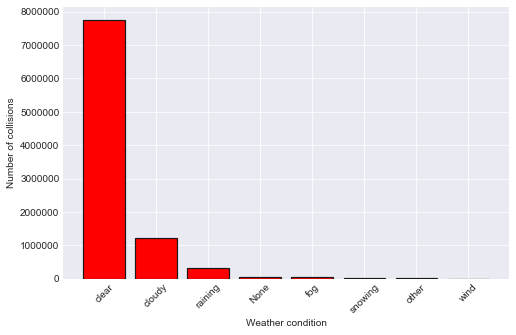

In [21]:
weather= %sql SELECT weather_1 AS 'Weather condition',count(*) AS 'Number of collisions' \
              FROM collisions \
              GROUP BY weather_1 \
              ORDER BY count(*) DESC \

plt.figure(figsize=(8,5))
weather.bar(color='red',edgecolor='0.1',linewidth=1.2)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

it can be seeen that more collsions occured with clear weather condition followed by cloudy and raining weather conditions. fewer collisions happened with respect to the other weather condition (such as fog,snowing ,wind etc.)

## 12. Road surface and collision

In [22]:
%%sql SELECT COALESCE(road_surface,'group_total') AS 'road_surface',
        COALESCE(road_condition_1,'group_total') AS 'road_condition',
        count(*) AS 'Number of traffic collsions'
FROM collisions
WHERE (road_surface IN ('dry','wet','slippery','snowy'))
GROUP BY 
  ROLLUP (road_surface,road_condition_1)
ORDER BY count(*) DESC

road_surface,road_condition,Number of traffic collsions
group_total,group_total,9343065
dry,group_total,8515058
dry,normal,8232798
wet,group_total,775564
wet,normal,740605
dry,construction,142981
snowy,group_total,41707
dry,group_total,39974
snowy,normal,35269
dry,obstruction,32120


Most traffic collisions happened when the road surface was dry and the road condition was normal. only around 10 thousand collsions happened when the road was slippery. it can be deduced that there are more important factors that contributed to collisions than road surface, or condition

## 13. How many were hit and run cases?

In [23]:
%%sql
SELECT hit_and_run,
       ROUND((count(*)*1.0)/(SELECT count(*)FROM collisions 
                        WHERE hit_and_run IN ('felony','misdemeanor','not hit and run'))*100,2) AS 'Percent'
FROM collisions
WHERE hit_and_run IN ('felony','misdemeanor','not hit and run')
GROUP BY hit_and_run
ORDER BY Percent DESC


hit_and_run,Percent
not hit and run,80.49
misdemeanor,16.67
felony,2.84


it can be seen that most of the cases where not hit and run and only about 2.84% constitute felony

## 14. what pcf violation category is most frequent?

In [24]:
%%sql --Top 10 pcf violation category
SELECT pcf_violation_category,count(*) AS 'Number of collsions'
FROM collisions
WHERE (pcf_violation_category NOT IN ('21804','22350')) AND (pcf_violation_category IS NOT NULL)
GROUP BY pcf_violation_category
ORDER BY count(*) DESC
LIMIT 10;

pcf_violation_category,Number of collsions
speeding,2911725
improper turning,1627618
automobile right of way,1111967
dui,695636
unsafe lane change,653108
traffic signals and signs,514782
unsafe starting or backing,352417
unknown,293802
wrong side of road,219298
other than driver (or pedestrian),203446


the number one pcf violation category is speeding. speed reduction measures such as speed humps,rumble strips should be adopted to limit speeding.

## 15. traffic collisions with respect to lighting?

In [25]:
%%sql 
SELECT lighting,count(*) As 'Number of collisions'
FROM collisions
WHERE (lighting IS NOT NULL) AND (lighting <> 'G')
GROUP BY lighting
ORDER BY count(*) DESC

lighting,Number of collisions
daylight,6279705
dark with street lights,1981315
dark with no street lights,762813
dusk or dawn,329345
dark with street lights not functioning,17847


more than 60% of the entire collisions happened during daylight, this supports the previous analysis that showed that most collsions happening during the afternoon.

## 16. which day of the weeek has more collisions?

In [26]:
%%sql --get percentage of each day collision

SELECT DAYNAME (CAST(collision_date AS DATE)) AS 'Day of the week',
       ROUND((count(*)*100.0)/(SELECT count(*) FROM collisions),2) AS 'percent of total collisions'
FROM collisions
GROUP BY DAYNAME (CAST(collision_date AS DATE))
ORDER BY "percent of total collisions" DESC

Day of the week,percent of total collisions
Friday,16.51
Thursday,14.77
Wednesday,14.67
Tuesday,14.6
Monday,14.01
Saturday,13.75
Sunday,11.7


About 16.51% of the overall traffic collisions happened on Friday,followed by thursdays with 14.77% while sunday has the lowest collision and accounts for about 11.7% of overall traffic collisions

## 17. What race is most involved in collisions?

In [27]:
%%sql
SELECT party_race,count(*) As 'Number of collisions'
FROM parties
WHERE (party_race IS NOT NULL) 
GROUP BY party_race
ORDER BY count(*) DESC

party_race,Number of collisions
white,5932763
hispanic,5013959
black,1267606
asian,1139060
other,941649


whites make up the larger proportion of parties involved in traffic collisions

## 18. Ranking the 7 most frequent vehicle make involved in traffic collisions ?	

In [28]:
%%sql
WITH vehicle_collisions AS (SELECT DISTINCT vehicle_make,
       COUNT(*) OVER (PARTITION BY vehicle_make) AS 'Number of collisions',
FROM parties
WHERE (vehicle_make IS NOT NULL))

SELECT *,RANK() OVER(ORDER BY "Number of collisions" DESC) AS 'Rank'
FROM vehicle_collisions
LIMIT 7;

vehicle_make,Number of collisions,Rank
toyota,2736693,1
ford,2407493,2
honda,1992090,3
chevrolet,1728584,4
nissan,1103702,5
dodge,755748,6
gmc,369280,7


Toyoto is the vehicle make with most traffic collisions,followed by ford and the rest

## 19. how many collisions involved school buses?

In [29]:
%%sql  -- collisions involving school bus, null represents non-bus related
SELECT school_bus_related AS 'School bus related',
       COUNT(*) AS 'Number of collisions',
       CONCAT(ROUND((100.0* COUNT(*))/(SELECT COUNT(*) FROM collisions),2),'%') AS 'percent'
FROM parties
WHERE (school_bus_related IS NOT NULL) 
GROUP BY school_bus_related


School bus related,Number of collisions,percent
1,52448,0.56%


About 52448 collisions involved school buses, and this accounts for about 0.56% of total collisions

## 20. what injury was most frequent among victims ?

In [30]:
%%sql
SELECT victim_degree_of_injury AS "victim's degree of injury",
       CONCAT(ROUND((100.0* COUNT(*))/(SELECT COUNT(*) FROM collisions),2),'%') AS 'percent'
FROM victims
WHERE (victim_degree_of_injury IS NOT NULL) 
GROUP BY victim_degree_of_injury
ORDER BY COUNT(*) DESC

victim's degree of injury,percent
no injury,45.37%
complaint of pain,35.48%
other visible injury,13.55%
possible injury,2.85%
severe injury,2.37%
suspected minor injury,1.49%
killed,0.77%
suspected serious injury,0.4%


About 45.37% of the victims sustained no injury, 35.48% complained of pain as shown above. only 0.77% died, while 0.4% were suspected of serious injury

## 21. ages of the victims?

In [31]:
%%sql ---summary stats of victim_age 
SUMMARIZE SELECT victim_age FROM victims;

column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
victim_age,BIGINT,0,999,126,31.114293979121094,19.811196452633556,17,27,44,9639334,3.35%


From the summary stat(s) of the victim_age column, it can be seen that the median age is 27 years and 75% of the people involved are less than or equal to 44 years. the max age of 999 represents Fatal Fetus, while those with 0 years can be assumed as babies not up to 1 years old. and hence all this values will be kept, with the 999 changed to 0 also. The null values in the column is about 3.35% of the total overall values.

In [32]:
%%sql --create view to store query
CREATE VIEW victim_view AS (SELECT (CASE 
       WHEN victim_age =999 THEN 0
       ELSE victim_age
       END )AS victim_age_cor
FROM victims
WHERE victim_age IS NOT NULL)


Count


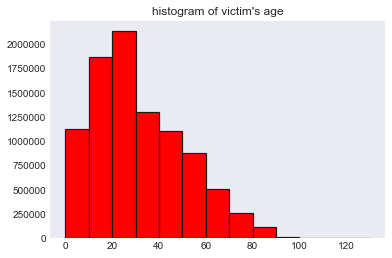

In [33]:
plot = %sql SELECT victim_age_cor FROM victim_view 
plot= plot.DataFrame()
plot.hist(color='red',grid=False,bins=range(0,135,10),edgecolor='0.1',linewidth=1.2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("histogram of victim's age")
plt.show()

individuals with ages 10-20, and 20-30 have more frequency than other group.

**There is so much to discover from analysing this database. i have attempted to answer just some few questions in this notebook but further analysis can always be carried out to discover more interesting information.**